In [2]:
import pandas as pd
# Let us shuffle our data, by shuffling one of the columns
unmodified_data =pd.read_csv("../data/VDJ_test_2.csv")
output = pd.read_csv("../output/output-20240122-152625.csv")

In [3]:
scores = output["score"]

In [4]:
unmodified_data['CDR3a'] = unmodified_data['CDR3a'].sample(frac=1).values

In [6]:
unmodified_data.to_csv("../data/VDJ_test_2_shuffled.csv")

(array([   4.,    6.,   20.,   36.,   61.,   62.,  150.,  817., 2257.,
        2733.]),
 array([-7.90280609e+01, -7.11252565e+01, -6.32224522e+01, -5.53196478e+01,
        -4.74168434e+01, -3.95140390e+01, -3.16112347e+01, -2.37084303e+01,
        -1.58056259e+01, -7.90282154e+00, -1.71660649e-05]),
 <BarContainer object of 10 artists>)

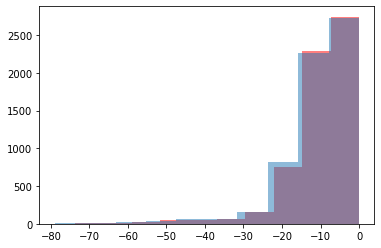

In [8]:
import matplotlib.pyplot as plt

shuffled_output = pd.read_csv("../output/output-20240128-233714_shuffled.csv")
shuffled_scores = shuffled_output["score"]
plt.hist(shuffled_scores, color="red", alpha=0.5)
plt.hist(scores, alpha=0.5)

We will do this again, but try a different strategy. We will extract all positive entries first, and then compare those outputs

In [2]:
import pandas as pd
# Let us shuffle our data, by shuffling one of the columns
unmodified_input =pd.read_csv("../data/input_original.csv")

In [10]:
all_positives_input = unmodified_input.loc[unmodified_input["binder"] == 1]
all_positives_input

,Unnamed: 0,CDR3b,CDR3a,peptide,MHC,binder
0,0,CASSIRASYEQYF,CAGASGNTGKLIF,GILGFVFTL,HLA-A*02:01,1
1,1,CASSIRSTDTQYF,CAGSGGGSQGNLIF,GILGFVFTL,HLA-A*02:01,1
2,2,CASSIRAADTQYF,CALDMGGGSQGNLIF,GILGFVFTL,HLA-A*02:01,1
3,3,CATSSGTGAYEQYF,CVVNAHDMRF,LLWNGPMAV,HLA-A*02:01,1
4,4,CASSDASGSIGEQFF,CAVTVSNDYKLSF,CINGVCWTV,HLA-A*02:01,1
...,...,...,...,...,...,...
871,871,CASSIRSSYEQYF,CAVPKGSQGNLIF,GILGFVFTL,HLA-A*02:01,1
872,872,CASSTRTSGNSYNEQFF,CAVEDYKAAGNKLTF,FLASKIGRLV,HLA-A*02:01,1
873,873,CALSDQNTGELFF,CVVNKDDKIIF,YLQPRTFLL,HLA-A*02:01,1
874,874,CSARDSMAQNTGELFF,CVVNNADKLIF,YLQPRTFLL,HLA-A*02:01,1


In [9]:
scrambled_input = all_positives_input.copy()
scrambled_input['CDR3a'] = scrambled_input['CDR3a'].sample(frac=1).values
scrambled_input

,Unnamed: 0,CDR3b,CDR3a,peptide,MHC,binder
0,0,CASSIRASYEQYF,CAASGTQTGANNLFF,GILGFVFTL,HLA-A*02:01,1
1,1,CASSIRSTDTQYF,CAGAYGGSQGNLIF,GILGFVFTL,HLA-A*02:01,1
2,2,CASSIRAADTQYF,CAVDTNTDKLIF,GILGFVFTL,HLA-A*02:01,1
3,3,CATSSGTGAYEQYF,CAVSPYGGSQGNLIF,LLWNGPMAV,HLA-A*02:01,1
4,4,CASSDASGSIGEQFF,CAGLGGKLIF,CINGVCWTV,HLA-A*02:01,1
...,...,...,...,...,...,...
871,871,CASSIRSSYEQYF,CGYGGSQGNLIF,GILGFVFTL,HLA-A*02:01,1
872,872,CASSTRTSGNSYNEQFF,CAGDDQGGKLIF,FLASKIGRLV,HLA-A*02:01,1
873,873,CALSDQNTGELFF,CAVKPGTASKLTF,YLQPRTFLL,HLA-A*02:01,1
874,874,CSARDSMAQNTGELFF,CATADFTSGTYKYIF,YLQPRTFLL,HLA-A*02:01,1


In [12]:
all_positives_input.to_csv("../data/input_2.2.1.csv")
scrambled_input.to_csv("../data/input_2.2.2.csv")

<module 'matplotlib.pyplot' from 'c:\\Users\\akesh\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

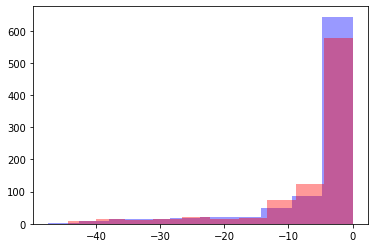

In [3]:
from plotting import get_overlayed_distributions, get_unique_output

sources = [get_unique_output("2.2.1"), get_unique_output("2.2.2")]
colours = ["blue", "red"]
shared_pre_dir = "../output/"

get_overlayed_distributions(sources, shared_pre_dir, colours)